In [1]:
library(ggplot2)
library(coda)

# Exercise 1 #

given the following un-normalized posterior distribution:

$$
g(\theta \mid x) \propto \frac{1}{2} \exp -\frac{(\theta+3)^{2}}{2}+\frac{1}{2} \exp -\frac{(\theta-3)^{2}}{2}
$$

•draw a Markov Chain from the posterior distribution using a Metropolis-Hastings algorithm

•use a Norm (0,1) as random-walk candidate density

•plot the sampled distribution

ERROR: Error in if (logMR >= 0 || logMR <= runif(1)) {: missing value where TRUE/FALSE needed


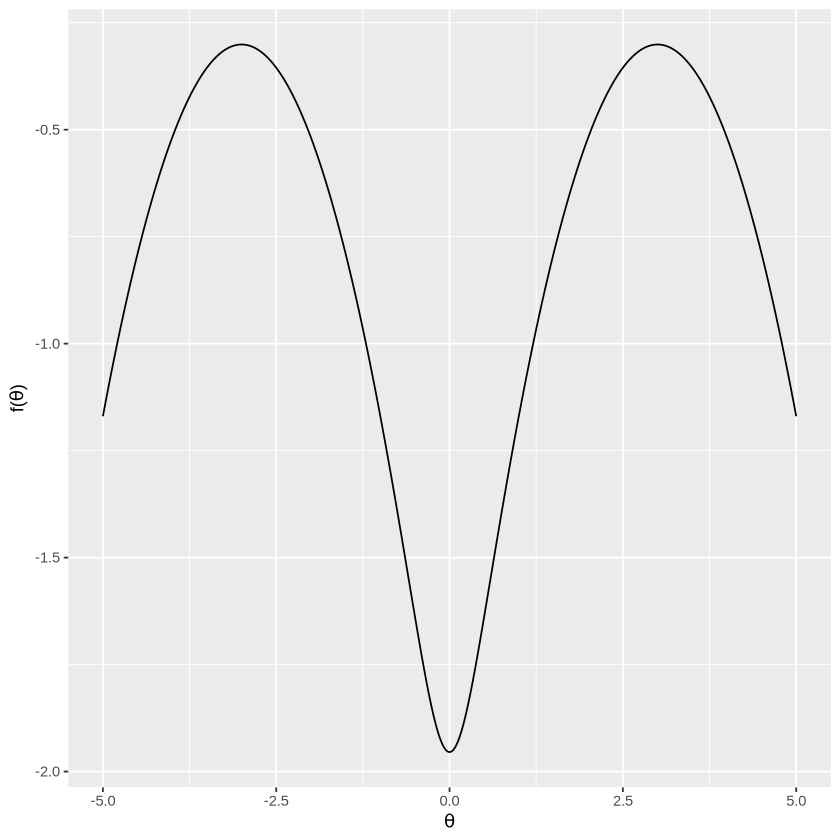

In [6]:
gfunc <- function(theta) {
    return(0.5 * exp(-((theta + 3)^2 / 2)) + 0.5 * exp(-(theta - 3)^2 / 2))
}

metropolis <- function(func, theta_init, n_samples) {
    # Initialization
    theta_curr <- theta_init
    func_curr <- func(theta_curr)
    func_samp <- matrix(data=NA, nrow=n_samples, ncol=2)
    n_accept <- 0

    for (n in 1:n_samples) {
        # Extract the proposed state
        theta_prop <- rnorm(1, theta_curr, 1)
        func_prop <- func(theta_prop)
        logMR <- func_prop - func_curr  ## Log10 of func must be given in 

        if (logMR >= 0 || logMR <= runif(1)) {
            theta_curr <- theta_prop
            func_curr <- func_prop
            n_accept <- n_accept + 1
        }
        func_samp[n, 1] <- func_curr
        func_samp[n, 2] <- theta_curr
    }
    return(func_samp)
}

# Plot the actual function
t = seq(-5, 5, 10 / 1e5)
df = data.frame(theta = t, func = log10(gfunc(t)))
#plot(t, log10(gfunc(t)), xlab = )
ggplot(df, aes(x = theta, y = func)) +
    geom_line(aes(x = theta, y = func)) +
    xlab(expression(theta)) + 
    ylab(expression(paste('f(',theta,')', sep='')))

# Testing
theta_init <- 1
n_samples <- 1e5
func_test <- function(theta) {
    return(log10(gfunc(theta)))
}

#set.seed(12345)
result <- metropolis(func_test, theta_init, n_samples)
#result[, 1]
func_res = array(result[, 1])
theta_res = array(result[, 2])
actual_func = log10(gfunc(theta_res))
df_result = data.frame(theta_res = theta_res, func_res = func_res, actual_func = actual_func)
ggplot(df_result) +
    geom_line(aes(x = theta_res, y = func_res), color = 'red') +
    geom_line(aes(x = theta_res, y = actual_func), color = 'blue') +
    xlab(expression(theta)) + 
    ylab(expression(paste('f(',theta,')', sep='')))
#plot(theta_res, func_res, xlab = expression(theta), ylab = expression(paste('f(',theta,')', sep='')))
#result

•analyze the chain with the CODA package and plot the chain autocorrelation

In [ ]:
coda_chain = as.mcmc(theta_res)

lags = seq(0, 1000, 10)
corr = autocorr(coda_chain, lags)
#print(corr)

df = data.frame(lags = lags, corr = corr)

ggplot(df) +
    geom_line(aes(lags, corr), color = 'navyblue') +
    geom_point(aes(lags, corr)) +
    xlab("Lags") +
    ylab("Correlation")



•try to use different burn-in cycles and thinning and plot the corresponding posterior distribution
and the chain autocorrelation function. What are the best parameters ?

In [ ]:
# Plot the actual function
t = seq(-5, 5, 10 / 1e5)
df = data.frame(theta = t, func = log10(gfunc(t)))
#plot(t, log10(gfunc(t)), xlab = )
ggplot(df, aes(x = theta, y = func)) +
    geom_line(aes(x = theta, y = func), color = 'navyblue') +
    labs(title = "Actual function") +
    xlab(expression(theta)) + 
    ylab(expression(paste('f(',theta,')', sep='')))

func_test <- function(theta) {
    return(log10(gfunc(theta)))
}

par(mfrow = c(2, 10))
# Testing
for (theta in seq(-5, 5, 1)) {
    # Testing
    print(theta)
    theta_init <- theta
    n_samples <- 1e5

    #set.seed(12345)
    result <- metropolis(func_test, theta_init, n_samples)
    func_res = array(result[, 1])
    theta_res = array(result[, 2])
    actual_func = log10(gfunc(theta_res))
    df_result = data.frame(theta_res = theta_res, func_res = func_res, actual_func = actual_func)
    ggplot(df_result) +
        geom_line(aes(x = theta_res, y = func_res), color = 'red') +
        geom_line(aes(x = theta_res, y = actual_func), color = 'blue') +
        xlab(expression(theta)) + 
        ylab(expression(paste('f(',theta,')', sep='')))
}

In [ ]:
# Burn-in 
for (n_burn_in in seq(0, 1000, 100)) {
    result_burnt = result[n_burn_in:n_samples,]

    func_res = array(result_burnt[, 1])
    theta_res = array(result_burnt[, 2])
    df_result = data.frame(theta_res = theta_res, func_res = func_res)
    ggplot(df_result) +
        geom_line(aes(x = theta_res, y = func_res), color = 'red') +
        labs(title = paste("Burn-in", n_burn_in)) +
        xlab(expression(theta)) + 
        ylab(expression(paste('f(',theta,')', sep='')))
}

# Exercise 2 #

A set of measured data should follow, according to the physics model applied to them, a linear
behavior. Data are the following:

| $\mathrm{Y}$ | -7.821 | -1.494 | -15.444 | -10.807 | -13.735 | -14.442 | -15.892 | -18.326 |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| $\mathrm{X}$ | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 |

• perform a simple linear regression model running a Markov Chain Monte Carlo with JAGS, assuming
that data follow the model:

$$
(\mathrm{Z}[\mathrm{i}]=\mathrm{a}+\mathrm{b} * \mathrm{X}[\mathrm{i}])
$$